In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR



In [6]:
df=pd.read_csv('/content/tips (data for regression problem).csv')

# New Section

In [7]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [8]:
df.isnull().sum()
df.drop_duplicates(inplace=True)


In [9]:
X = df.drop('tip', axis=1)
y = df['tip']

# Define preprocessor for numerical and categorical columns
numerical_features = ['total_bill', 'size']
categorical_features = ['sex', 'smoker', 'day', 'time']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Define pipeline with preprocessor and Lasso regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.1))  # Adjust alpha as needed
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display coefficients for feature importance
lasso_model = model.named_steps['lasso']
feature_names = model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
feature_names = numerical_features + list(feature_names)
coef = lasso_model.coef_

# Print each feature and its coefficient
print("Feature Importance in Lasso Regression:")
for feature, coef in zip(feature_names, coef):
    print(f'{feature}: {coef}')

Mean Squared Error: 1.2176213697088816
R-squared: 0.5002528884182162
Feature Importance in Lasso Regression:
total_bill: 0.6739090355873779
size: 0.1548712460833007
sex_Male: 0.0
smoker_Yes: -0.0
day_Sat: -0.0
day_Sun: 0.0
day_Thur: -0.0
time_Lunch: -0.0


In [10]:
X = df.drop('tip', axis=1)
y = df['tip']

# Define preprocessor for numerical and categorical columns
numerical_features = ['total_bill', 'size']
categorical_features = ['sex', 'smoker', 'day', 'time']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Define pipeline with preprocessor and Ridge regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha=1.0))  # Adjust alpha as needed
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display coefficients for feature importance
ridge_model = model.named_steps['ridge']
feature_names = model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
feature_names = numerical_features + list(feature_names)
coef = ridge_model.coef_

# Print each feature and its coefficient
print("Feature Importance in Ridge Regression:")
for feature, coef in zip(feature_names, coef):
    print(f'{feature}: {coef}')

Mean Squared Error: 1.1730715729929895
R-squared: 0.5185374165845096
Feature Importance in Ridge Regression:
total_bill: 0.7390493168092539
size: 0.20377392493768376
sex_Male: 0.019211197768807326
smoker_Yes: -0.050071012648003545
day_Sat: 0.07214567933002669
day_Sun: 0.13523691305876162
day_Thur: -0.029190733217017165
time_Lunch: 0.1427002121880682


In [14]:
df_encoded = pd.get_dummies(df, drop_first=True)

# Split data into features and target
X = df_encoded.drop('tip', axis=1)
y = df_encoded['tip']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for SVR (optional for tree-based models, essential for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate and display model performance
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    print(f"{model_name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")

# 1. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest Regressor")

# 2. Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
evaluate_model(dt_model, X_train, y_train, X_test, y_test, "Decision Tree Regressor")

# 3. Support Vector Regressor (SVR)
svr_model = SVR()
evaluate_model(svr_model, X_train_scaled, y_train, X_test_scaled, y_test, "Support Vector Regressor")

Random Forest Regressor - RMSE: 1.05, R²: 0.55
Decision Tree Regressor - RMSE: 1.15, R²: 0.46
Support Vector Regressor - RMSE: 1.22, R²: 0.39


As we can see Random Forest regressor has the most R^2 value and least RMSE value indicating the non linearity of the data.
Thus the best model for the prediction is Random Forest.

INSIGHTS FOR MANAGEMENT



*   Encourage Larger Groups and Higher Bills: Since total_bill and size
have a significant impact on tips, encouraging larger group reservations or promoting upsells (like side dishes or beverages) can indirectly increase tips.
*   Target Specific Days and Times: Tips tend to be slightly higher on Sundays and during lunch hours. Management could focus marketing efforts or offer special promotions during these times to boost foot traffic and revenue.




In [16]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


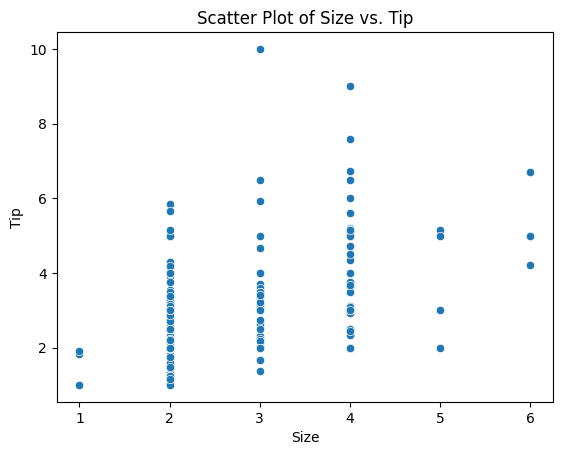

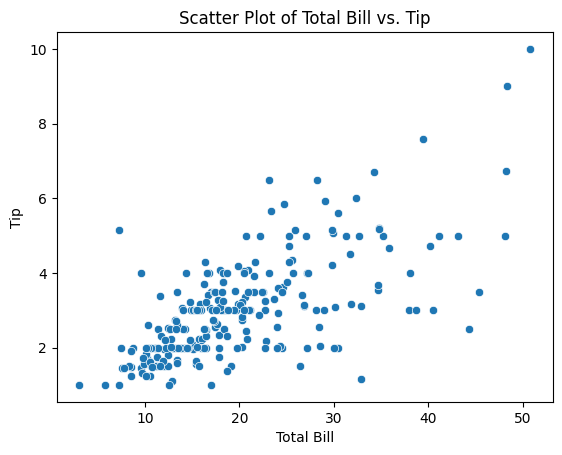

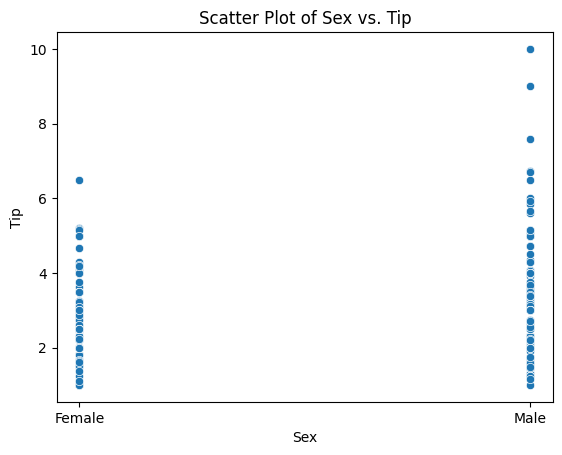

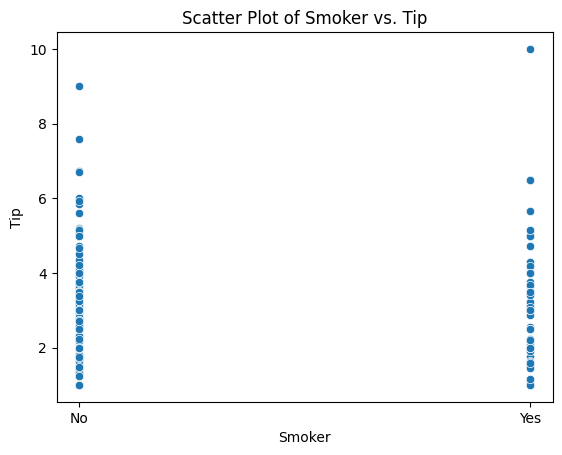

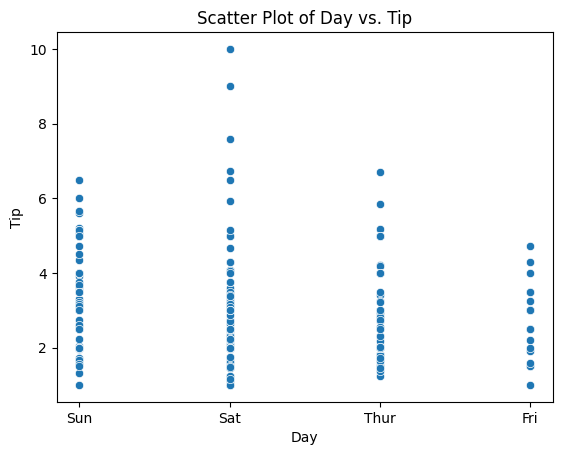

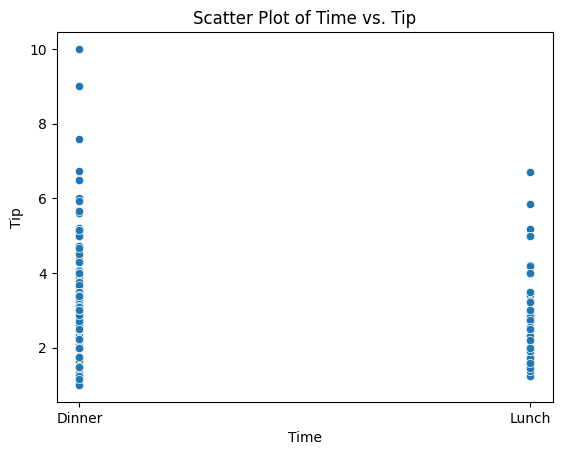

In [18]:
# Scatter plot of 'size' vs. 'tip'
sns.scatterplot(x='size', y='tip', data=df)
plt.title("Scatter Plot of Size vs. Tip")
plt.xlabel("Size")
plt.ylabel("Tip")
plt.show()

# Scatter plot of 'total_bill' vs. 'tip'
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title("Scatter Plot of Total Bill vs. Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

# Scatter plot of 'sex' vs. 'tip'
sns.scatterplot(x='sex', y='tip', data=df)
plt.title("Scatter Plot of Sex vs. Tip")
plt.xlabel("Sex")
plt.ylabel("Tip")
plt.show()

# Scatter plot of 'smoker' vs. 'tip'
sns.scatterplot(x='smoker', y='tip', data=df)
plt.title("Scatter Plot of Smoker vs. Tip")
plt.xlabel("Smoker")
plt.ylabel("Tip")
plt.show()

# Scatter plot of 'day' vs. 'tip'
sns.scatterplot(x='day', y='tip', data=df)
plt.title("Scatter Plot of Day vs. Tip")
plt.xlabel("Day")
plt.ylabel("Tip")
plt.show()

# Scatter plot of 'time' vs. 'tip'
sns.scatterplot(x='time', y='tip', data=df)
plt.title("Scatter Plot of Time vs. Tip")
plt.xlabel("Time")
plt.ylabel("Tip")
plt.show()


From the scatter plot we can see that only the total bill shows little linearity at lower values but others doesn't show much linearity.

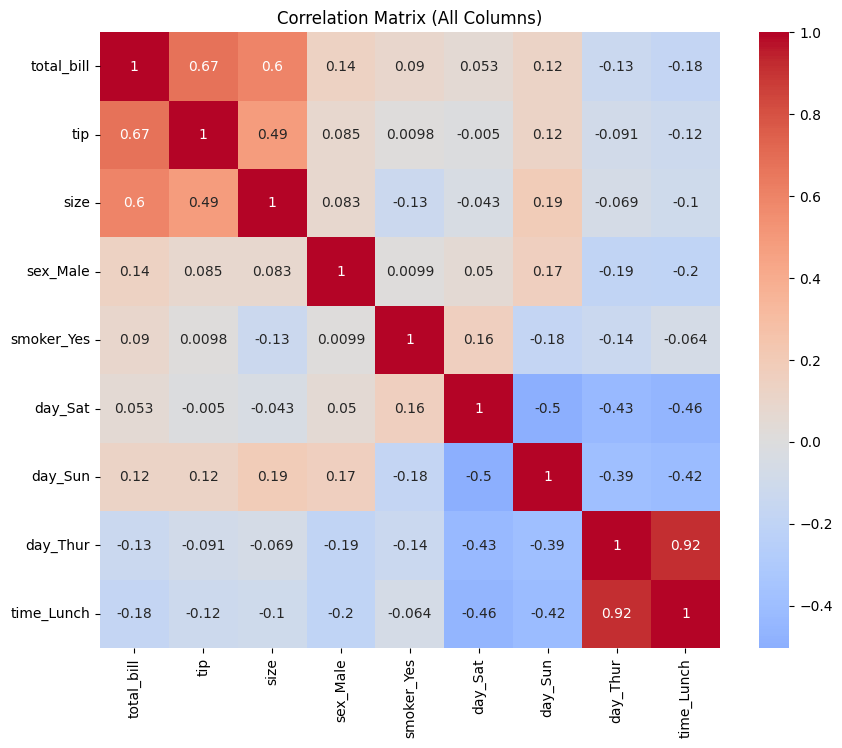

In [22]:
df_encoded = pd.get_dummies(df, drop_first=True)

# Compute correlation matrix with all columns
corr = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed for better readability
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix (All Columns)")
plt.show()

Total Bill and SIze had good correlation especially total bill thus explains the small linearity at the scatter plot. Sunday and lunch time also have a little correlation , the rest are negligibile.

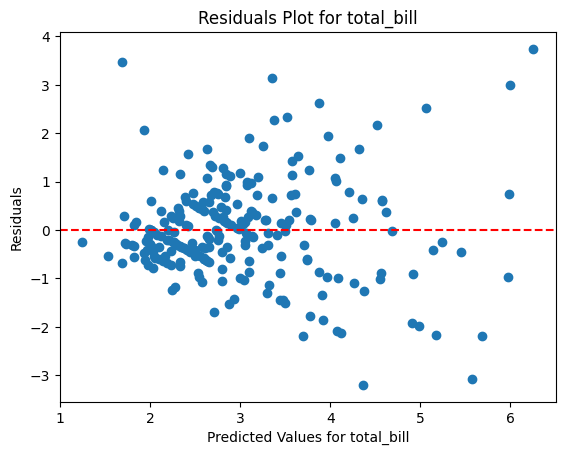

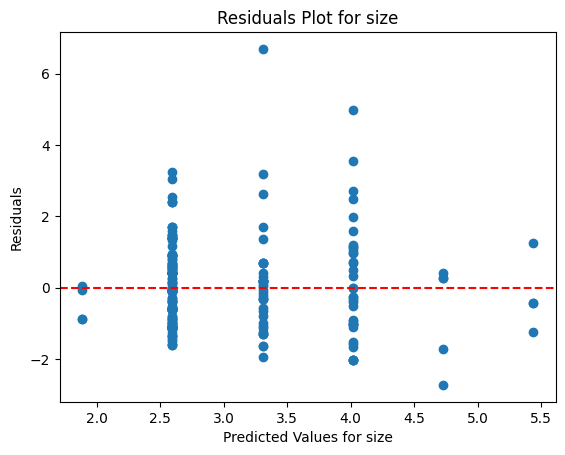

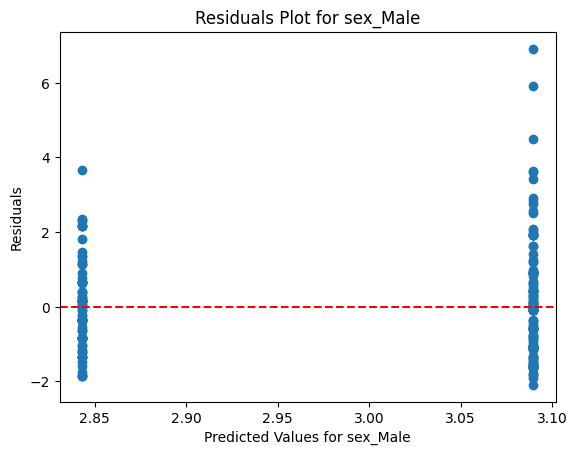

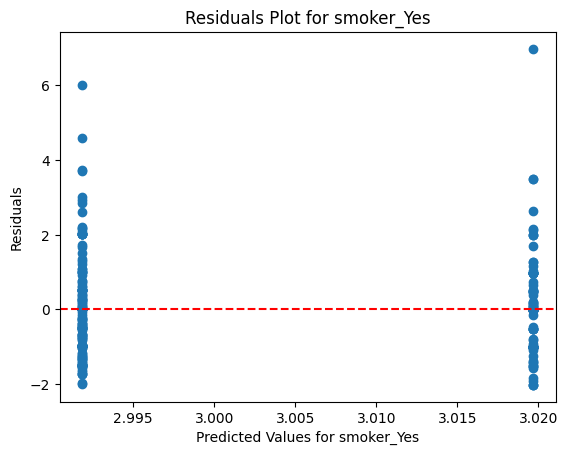

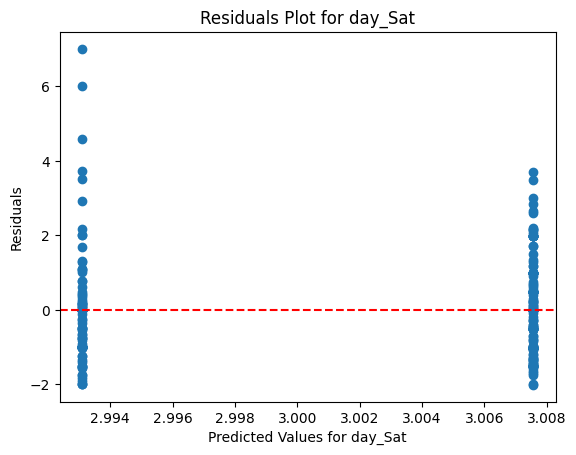

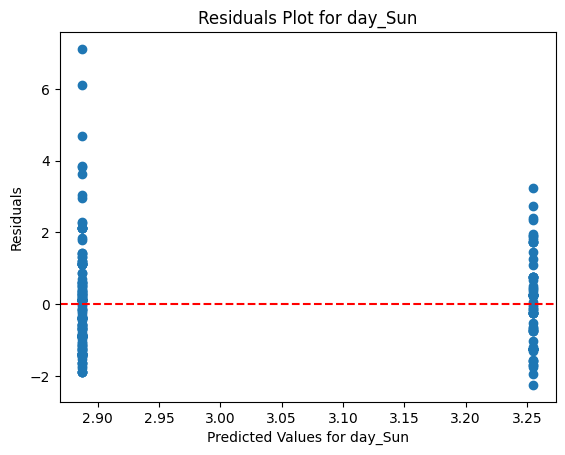

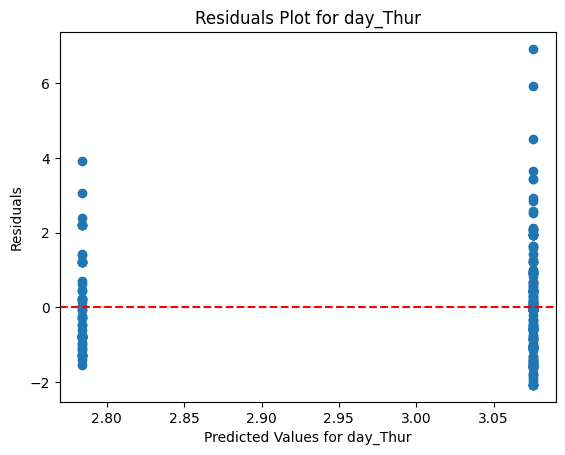

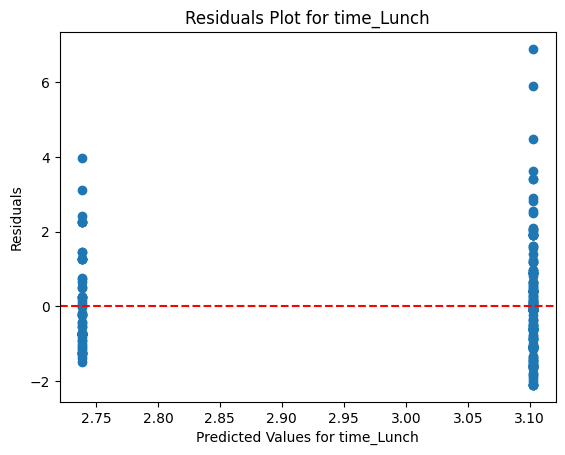

In [24]:
df_encoded = pd.get_dummies(df, drop_first=True)

# List of columns to iterate over (all columns except 'tip')
columns = df_encoded.drop('tip', axis=1).columns

# Loop through each column, fit the model and plot residuals separately
for col in columns:
    # Define the predictor and target
    X = df_encoded[[col]]
    y = df_encoded['tip']

    # Fit the model
    model = LinearRegression().fit(X, y)
    predictions = model.predict(X)

    # Calculate residuals
    residuals = y - predictions

    # Plot residuals
    plt.scatter(predictions, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel(f"Predicted Values for {col}")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {col}")
    plt.show()


Only total bill and size show slight linearity at parts. In the beggining of the total bill and at the middle of size.

The model prediction accuracy of Raandom Forest is the best as we have seen above thus showing non linearity.